In [88]:
import pandas as pd

In [89]:
df = pd.read_csv('Dataset/german_credit_data.csv')
df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [90]:
df.drop(columns=['Unnamed: 0' , 'Sex' , 'Checking account'] , inplace=True)

In [91]:
df.isnull().sum()

Age                  0
Job                  0
Housing              0
Saving accounts    183
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [92]:
df.fillna(method='bfill' , inplace= True)

In [93]:
df.head()

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,2,own,little,1169,6,radio/TV
1,22,2,own,little,5951,48,radio/TV
2,49,1,own,little,2096,12,education
3,45,2,free,little,7882,42,furniture/equipment
4,53,2,free,little,4870,24,car


In [94]:
df.isnull().sum()

Age                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64

C:\Users\CS-L2-PC13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

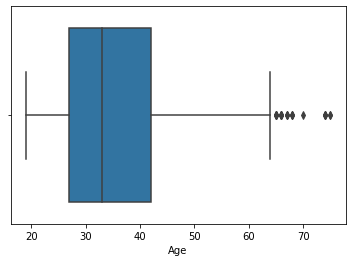

In [95]:
import seaborn as sns 

sns.boxplot(df['Age'])

In [96]:
q1 = df['Age'].quantile(0.25)
q1

27.0

In [97]:
q3 = df['Age'].quantile(0.75)
q3

42.0

In [98]:
iqr = q3-q1
iqr

15.0

In [99]:
ub = q3+1.5*iqr
ub

64.5

In [100]:
lb = q1-1.5*iqr
lb

4.5

In [101]:
import numpy as np
df['Age']=np.where(df['Age']>ub,
                  ub,
                  np.where(df['Age']<lb,
                          lb,
                          df['Age']))

In [102]:
df[(df['Age']>ub) | (df['Age']<lb)]

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose


C:\Users\CS-L2-PC13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

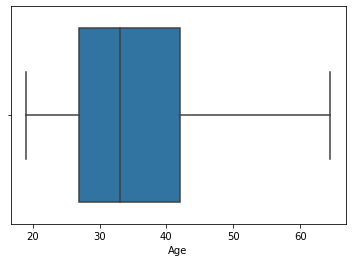

In [103]:
sns.boxplot(df['Age'])

C:\Users\CS-L2-PC13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

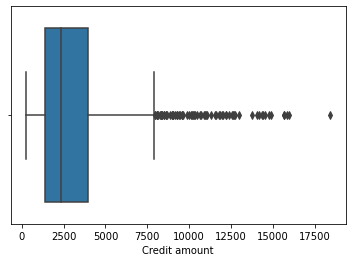

In [104]:
sns.boxplot(df['Credit amount'])

C:\Users\CS-L2-PC13\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

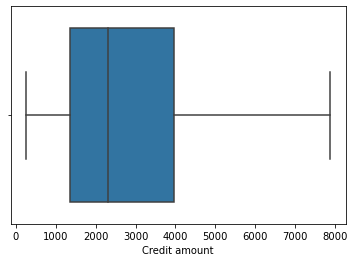

In [105]:
q1 = df['Credit amount'].quantile(0.25)

q3 = df['Credit amount'].quantile(0.75)

iqr = q3-q1

ub = q3+1.5*iqr

lb = q1-1.5*iqr

df['Credit amount']=np.where(df['Credit amount']>ub,
                  ub,
                  np.where(df['Credit amount']<lb,
                          lb,
                          df['Credit amount']))

df[(df['Credit amount']>ub) | (df['Credit amount']<lb)]

sns.boxplot(df['Credit amount'])

In [106]:
x = df.drop(columns=(df[['Credit amount']]))
y =df['Credit amount']

print("x : " , x.shape)
print("y : " , y.shape)


x :  (1000, 6)
y :  (1000,)


In [107]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test=train_test_split(x , y , train_size=0.2 , random_state=42)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder 
from sklearn.impute import SimpleImputer

trf1 = ColumnTransformer(transformers=[
    ('tr1' , OneHotEncoder( sparse=False,handle_unknown='ignore'),['Purpose'])
],remainder='passthrough')
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Purpose'])])

In [109]:
trf2 = ColumnTransformer(transformers=[
    ('tr2' , OrdinalEncoder(categories=[['own', 'free', 'rent']]) ,  ['Saving accounts']),
    ('tr3' , OrdinalEncoder(categories=[['own' , 'rent' , 'free']]), ['Housing'])
],remainder='passthrough')
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr2',
                                 OrdinalEncoder(categories=[['own', 'free',
                                                             'rent']]),
                                 ['Saving accounts']),
                                ('tr3',
                                 OrdinalEncoder(categories=[['own', 'rent',
                                                             'free']]),
                                 ['Housing'])])

In [110]:

trf3=ColumnTransformer([
('tr4',SimpleImputer(),['Jod'])
],remainder='passthrough')
trf3


ColumnTransformer(remainder='passthrough',
                  transformers=[('tr4', SimpleImputer(), ['Jod'])])

In [111]:


trf1 = ColumnTransformer(transformers=[
    ('tr1' , OneHotEncoder( sparse=False,handle_unknown='ignore'),(0,5))
],remainder='passthrough')
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 (0, 5))])

In [112]:
trf2 = ColumnTransformer(transformers=[
    ('tr2' , OrdinalEncoder(categories=[['little' ,'moderate', 'quite rich' , 'rich' ]]) ,  (0,3)),
    ('tr3' , OrdinalEncoder(categories=[['own' , 'rent' , 'free']]), (0,2))
],remainder='passthrough')
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr2',
                                 OrdinalEncoder(categories=[['little',
                                                             'moderate',
                                                             'quite rich',
                                                             'rich']]),
                                 (0, 3)),
                                ('tr3',
                                 OrdinalEncoder(categories=[['own', 'rent',
                                                             'free']]),
                                 (0, 2))])

In [113]:
trf3=ColumnTransformer([
('tr4',SimpleImputer(),[0,1])
],remainder='passthrough')
trf3

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr4', SimpleImputer(), [0, 1])])

In [114]:
df.head()

,Age,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,64.5,2,own,little,1169.0,6,radio/TV
1,22.0,2,own,little,5951.0,48,radio/TV
2,49.0,1,own,little,2096.0,12,education
3,45.0,2,free,little,7882.0,42,furniture/equipment
4,53.0,2,free,little,4870.0,24,car


In [115]:
#df['Job'].values

In [116]:
from sklearn.feature_selection import SelectKBest,chi2
skb=SelectKBest(score_func=chi2,k=4 )

from sklearn.linear_model import LinearRegression
lr  = LinearRegression()

In [117]:
from sklearn.pipeline import Pipeline,make_pipeline
pipe = Pipeline([
    ('trf1' , trf1),
    ('trf2' , trf2),
    ('trf3',trf3),
    ('skb',skb),
    ('lr' , lr)
])
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tr1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  (0, 5))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tr2',
                                                  OrdinalEncoder(categories=[['little',
                                                                              'moderate',
                                                                              'quite '
                                                                              'rich',
                                                                              'rich']]),
                                              

In [118]:
pipe.fit(x_train , y_train)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [ ]:
Shape mismatch: if categories is an array, it has to be of shape (n_features,).